# **Model Building**

In [15]:
# ----------------------------
# 1️⃣ Imports
# ----------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px





In [16]:
# ----------------------------
# 2️⃣ Load preprocessed dataset
# ----------------------------
df = pd.read_csv(r"F:\youtube_ad\clean_youtube_data.csv")
print("✅ Cleaned dataset loaded")
print(df.head())


✅ Cleaned dataset loaded
   video_id                        date  views   likes  comments  \
0  vid_3092  2024-09-24 10:50:40.993199   9936  1221.0     320.0   
1  vid_3459  2024-09-22 10:50:40.993199  10017   642.0     346.0   
2  vid_4784  2024-11-21 10:50:40.993199  10097  1979.0     187.0   
3  vid_4078  2025-01-28 10:50:40.993199  10034  1191.0     242.0   
4  vid_3522  2025-04-28 10:50:40.993199   9889  1858.0     477.0   

   watch_time_minutes  video_length_minutes  subscribers  category  device  \
0        26497.214184              2.862137       228086         1       2   
1        15209.747445             23.738069       736015         2       3   
2        57332.658498             26.200634       240534         0       2   
3        31334.517771             11.770340       434482         1       1   
4        15665.666434              6.635854        42030         0       1   

   country  ad_revenue_usd  engagement_rate  avg_watch_time_per_view  
0        3      203.178237

In [17]:
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate,avg_watch_time_per_view
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.000000,26497.214184,2.862137,228086,1,2,3,203.178237,0.155093,2.666789
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.000000,15209.747445,23.738069,736015,2,3,1,140.880508,0.098632,1.518393
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.000000,57332.658498,26.200634,240534,0,2,1,360.134008,0.214519,5.678187
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.000000,31334.517771,11.770340,434482,1,1,4,224.638261,0.142814,3.122834
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.000000,15665.666434,6.635854,42030,0,1,1,165.514388,0.236121,1.584151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.000000,42075.704885,25.490195,210818,0,3,5,280.986396,0.184715,4.270345
119996,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.000000,57563.703040,16.229133,878860,4,0,4,354.612981,0.174961,5.683620
119997,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,274.349842,27549.714659,23.822365,576756,5,3,1,203.643106,0.094901,2.683327
119998,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.000000,56967.384382,7.753099,585138,4,1,4,351.525811,0.168164,5.563221


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle



In [19]:
# ----------------------------
# 3️⃣ Encode categorical columns
# ----------------------------
category_encoder = LabelEncoder()
device_encoder = LabelEncoder()
country_encoder = LabelEncoder()

df['category'] = category_encoder.fit_transform(df['category'])
df['device'] = device_encoder.fit_transform(df['device'])
df['country'] = country_encoder.fit_transform(df['country'])

In [20]:
# -----------------------------
# 4️⃣ Feature Engineering
# -----------------------------
df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']
df['avg_watch_time_per_view'] = df['watch_time_minutes'] / df['views']

# Handle division by zero
df.replace([np.inf, -np.inf], 0, inplace=True)



In [52]:
#----------------
# 5️⃣ Target
#----------------
exclude_cols = ['ad_revenue_usd', 'video_id', 'date']
X = df.drop(columns=exclude_cols)
y = df['ad_revenue_usd']




In [53]:
# ----------------------------
# 6️⃣  Train/Test Split & Scaling
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training data → used to train the model.        |      Testing data → used to check model performance on unseen data.

test_size=0.2 → 20% of data for testing.        |      random_state=42 → ensures reproducibility.

### **MODEL BUILDING AND EVALUATION**

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [55]:
# -------------------------------
# 7️⃣ Model Building & Evaluation
# -------------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}

results = []


In [56]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append([name, r2, rmse, mae])


In [57]:
results_df = pd.DataFrame(results, columns=["Model", "R2", "RMSE", "MAE"])
results_df = results_df.sort_values(by="R2", ascending=False)
print(results_df)


               Model        R2       RMSE       MAE
0  Linear Regression  0.952582  13.478920  3.088809
3  Gradient Boosting  0.952030  13.557114  3.653435
4            XGBoost  0.950910  13.714480  3.675968
2      Random Forest  0.950118  13.824618  3.532572
1      Decision Tree  0.899897  19.584236  5.326971


C:\Users\Admin\AppData\Local\Temp\ipykernel_3128\1923777955.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis", ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3128\1923777955.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # safer
C:\Users\Admin\AppData\Local\Temp\ipykernel_3128\1923777955.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis", ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3128\1923777955.py:9: UserWarni

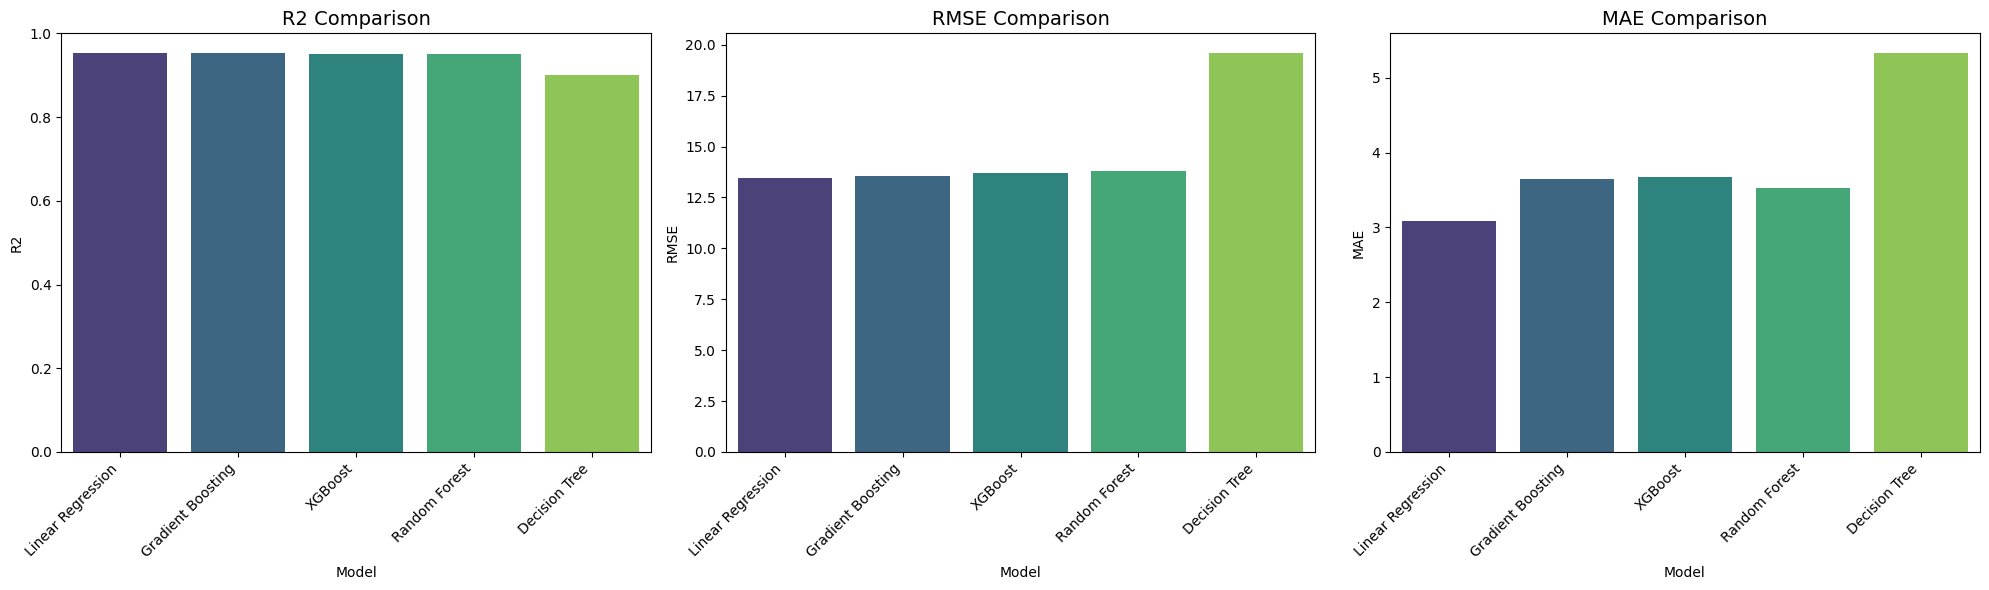

In [58]:
#Compare Model Performance
metrics = ["R2", "RMSE", "MAE"]

fig, axes = plt.subplots(1, 3, figsize=(20,6))  # 1 row, 3 columns

for ax, metric in zip(axes, metrics):
    sns.barplot(x="Model", y=metric, data=results_df, palette="viridis", ax=ax)
    ax.set_title(f"{metric} Comparison", fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # safer

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3128\1345754187.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.values, y=coefficients.index, palette="viridis")


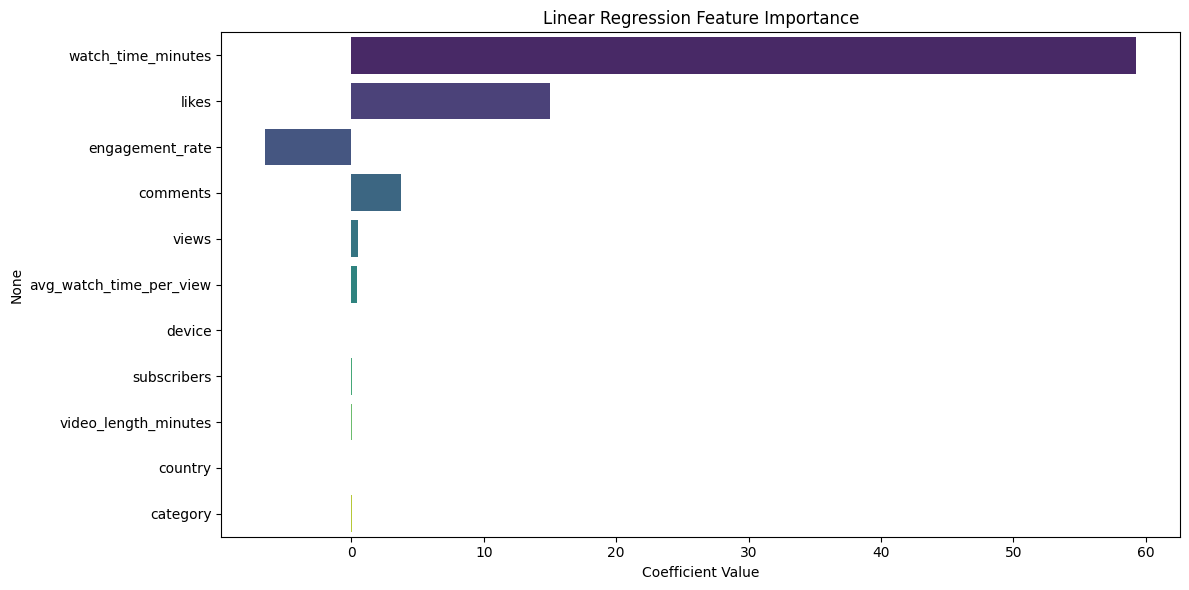

Top 10 Features driving ad revenue:
watch_time_minutes         59.284557
likes                      14.988672
engagement_rate            -6.528418
comments                    3.710029
views                       0.499290
avg_watch_time_per_view     0.400634
device                     -0.048281
subscribers                 0.026986
video_length_minutes        0.024838
country                    -0.019907
dtype: float64


In [59]:
# ----------------------------
# 7️⃣ Feature Importance (Linear Regression)
# ----------------------------
lr_model = models["Linear Regression"]
coefficients = pd.Series(lr_model.coef_, index=X.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=coefficients.values, y=coefficients.index, palette="viridis")
plt.title("Linear Regression Feature Importance")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

print("Top 10 Features driving ad revenue:")
print(coefficients.head(10))

In [60]:
# -------------------------------
# 8️⃣ Save Models, Scaler, Encoders & Feature Order
# -------------------------------
with open(r"F:\youtube_ad\linear_regression_model.pkl", "wb") as f:
    pickle.dump(lr_model, f)

with open(r"F:\youtube_ad\scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open(r"F:\youtube_ad\category_encoder.pkl", "wb") as f:
    pickle.dump(category_encoder, f)
with open(r"F:\youtube_ad\device_encoder.pkl", "wb") as f:
    pickle.dump(device_encoder, f)
with open(r"F:\youtube_ad\country_encoder.pkl", "wb") as f:
    pickle.dump(country_encoder, f)

feature_order = X.columns.tolist()
with open(r"F:\youtube_ad\feature_order.pkl", "wb") as f:
    pickle.dump(feature_order, f)

print("✅ All objects saved successfully!")


✅ All objects saved successfully!
